### Modeling 

In [5]:
import pandas as pd

#### Read data

In [6]:
df = pd.read_csv('../../data/cleaned/Apple_Inc_text_data')

# format datetime again
df['pub_date'] = pd.to_datetime(df['pub_date']) 
df['pub_date'] = df['pub_date'].dt.date

#### Labeling '1' if headline and abstract contain Apple
Will we use this?

In [7]:
# Labeling '1' if headline and abstract contain Apple
df['apple_label'] = df.apply(lambda x: 1 if 'Apple' in str(x['abstract']) and 'Apple' in str(x['headline']) else 0, axis=1)
df.head()

,pub_date,abstract,lead_para,headline,doc_type,section_name,type_of_material,rank,web_url,apple_label
0,2015-01-30,"James B. Stewart, on CNBC, discusses why Apple...","James B. Stewart, on CNBC, discusses why Apple...",Apple’s Near-Death Experience Saved It,multimedia,Business Day,Video,1,https://www.nytimes.com/video/business/1000000...,1
1,2015-01-14,You probably didn’t know about these five feat...,You probably didn’t know about these five feat...,Use the iPhone’s iOS 8 Like a Pro,multimedia,Technology,Video,5,https://www.nytimes.com/video/technology/perso...,0
2,2015-03-10,The Apple Watch is good looking for a smartwat...,SAN FRANCISCO — When Apple unveiled its watch ...,"Apple Watch Displays Your Digital World, at a ...",article,Technology,News,5,https://www.nytimes.com/2015/03/10/technology/...,1
3,2015-03-06,Third-party apps and recent operating system u...,Q. My Android phone just started freezing and ...,Troubleshooting Android in Safe Mode,article,Technology,Question,3,https://www.nytimes.com/2015/03/06/technology/...,0
4,2015-03-18,Here are some prominent services offering live...,Here are some prominent services offering live...,"Suddenly, Plenty of Options for Cord Cutters",multimedia,Business Day,Interactive Feature,3,https://www.nytimes.com/interactive/2015/busin...,0


In [8]:
df[df.apple_label==1].value_counts()

pub_date    abstract                                                                                                                                                                   lead_para                                                                                                                                                                                                                                                                                            headline                                                                    doc_type    section_name  type_of_material     rank  web_url                                                                                                      apple_label
2015-01-08  Google’s app store is the largest in the world, but still makes far less money than the Apple App Store.                                                                   Apple continues to make billions of dollars from mobile apps sold in its App Store. The com

####  Sentiment Analysis (NLTK, VADER, SentiMo)

Currently, use the Headline.

In the future, can consider:
1. Headline
2. Abstract
3. Lead para
4. Headline + Abstract (and weightage of each)
5. Headline + Lead para (and weightage of each)

In [9]:
sentiment_df=df.copy() #save the df first 

##### Text preprocessing/visualisation

* Purely for visualisation, not necessary for VADER

In [21]:
import nltk
nltk.download([
        "stopwords",
        "wordnet",
        # "averaged_perceptron_tagger",
        "vader_lexicon",
        "punkt",
        "punkt_tab",
    ])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trinatan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/trinatan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/trinatan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/trinatan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/trinatan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# [NOT USED] test function
# Reference: 
# https://medium.com/@khalidassalafy/sentiment-analysis-with-nltk-4afbb0bf6a49 (code)
# https://realpython.com/python-nltk-sentiment-analysis/ (frequency dist)

# create preprocess_text function

def preprocess_text(text):

    # Tokenize
    tokens = nltk.word_tokenize(text.lower())

    # Stop word removal
    filtered_tokens = [token for token in tokens if token not in nltk.corpus.stopwords.words('english')]

    # Lemmatize
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

test_text = df['headline'][0]
print(test_text)
preprocess_text(test_text)

Apple’s Near-Death Experience Saved It


'apple ’ near-death experience saved'

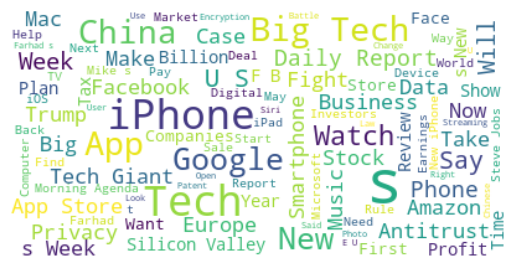

In [27]:
# Word cloud for all headlines
# Reference: https://www.datacamp.com/tutorial/wordcloud-python

from wordcloud import WordCloud # , STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Combine all headlines 
headlines = df['headline'].str.cat(sep=' ')
add_excluded_words = ['Apple']

def wordcloud_display(text, add_excluded_words):

    w = WordCloud()
    stop_words = list(w.stopwords)
    new_stop_words = set(stop_words + add_excluded_words)

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=new_stop_words).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


wordcloud_display(headlines, add_excluded_words)

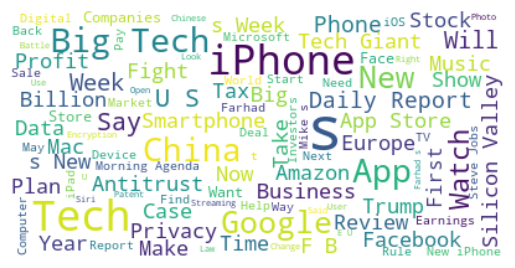

In [9]:
# Display abstracts
abstracts = df['headline'].str.cat(sep=' ')
wordcloud_display(abstracts, add_excluded_words)

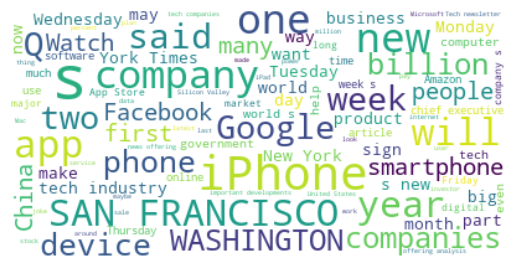

In [10]:
# Display lead paras
abstracts = df['lead_para'].str.cat(sep=' ')
wordcloud_display(abstracts, add_excluded_words)

##### VADER

In [16]:
# nltk imports
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leyon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# Run model
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # should not have any missing text anymore
    # if pd.isna(text):  # Handle NaN values
    #     return 0  # Neutral score for missing text
    return sia.polarity_scores(text)['compound']

x = sentiment_df['headline'].apply(get_sentiment)
# y = sentiment_df['abstract'].apply(get_sentiment)
# sentiment_df['vader_sent'] = (x+y)/2
sentiment_df['vader_sent']= x

def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

sentiment_df['vader_label'] = sentiment_df['vader_sent'].apply(classify_sentiment)
sentiment_df.head(5)



,pub_date,abstract,lead_para,headline,doc_type,section_name,type_of_material,rank,web_url,apple_label,rob_neg,rob_neu,rob_pos,rob_label,vader_sent,vader_label
0,2015-01-30,"James B. Stewart, on CNBC, discusses why Apple...","James B. Stewart, on CNBC, discusses why Apple...",Apple’s Near-Death Experience Saved It,multimedia,Business Day,Video,1,https://www.nytimes.com/video/business/1000000...,1,0.021050,0.222241,0.756709,Positive,0.4215,Positive
1,2015-01-14,You probably didn’t know about these five feat...,You probably didn’t know about these five feat...,Use the iPhone’s iOS 8 Like a Pro,multimedia,Technology,Video,5,https://www.nytimes.com/video/technology/perso...,0,0.002749,0.204900,0.792351,Positive,0.3612,Positive
2,2015-03-10,The Apple Watch is good looking for a smartwat...,SAN FRANCISCO — When Apple unveiled its watch ...,"Apple Watch Displays Your Digital World, at a ...",article,Technology,News,5,https://www.nytimes.com/2015/03/10/technology/...,1,0.006221,0.340990,0.652789,Positive,0.0000,Neutral
3,2015-03-06,Third-party apps and recent operating system u...,Q. My Android phone just started freezing and ...,Troubleshooting Android in Safe Mode,article,Technology,Question,3,https://www.nytimes.com/2015/03/06/technology/...,0,0.064944,0.839220,0.095836,Neutral,0.5574,Positive
4,2015-03-18,Here are some prominent services offering live...,Here are some prominent services offering live...,"Suddenly, Plenty of Options for Cord Cutters",multimedia,Business Day,Interactive Feature,3,https://www.nytimes.com/interactive/2015/busin...,0,0.016417,0.454158,0.529425,Positive,0.0000,Neutral


In [18]:
# visualising sentiment score over time for 2024 (weekly agg)
from datetime import date

date_start = date(2024, 1, 1)

vader_sent = sentiment_df[['pub_date','vader_sent']]
vader_sent = vader_sent[vader_sent['pub_date'] > date_start]
vader_sent['month_idx'] = vader_sent['pub_date'].apply(lambda x: x.strftime('%Y-%U')) # Use U instead of M for month

vader_time_sent = vader_sent.groupby(by='month_idx', as_index=False)['vader_sent'].mean()

# vader_time_sent["month_idx"] = vader_time_sent["pub_date"].apply(lambda x: x.strftime("%Y-%U"))
# vader_time_sent
vader_time_sent.head()

,month_idx,vader_sent
0,2024-00,0.000000
1,2024-01,0.385650
2,2024-02,0.059960
3,2024-03,0.127380
4,2024-04,0.112343


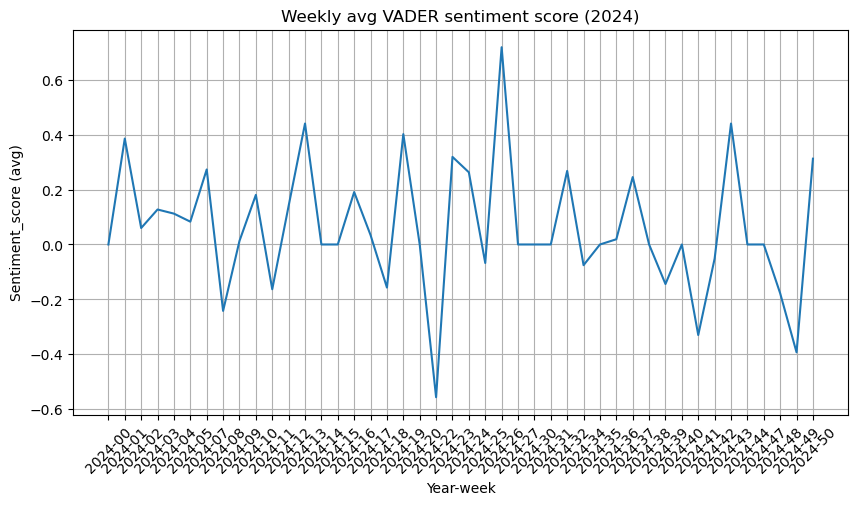

In [19]:
# visualise sentiment score over the years
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=vader_time_sent, x='month_idx', y='vader_sent')

plt.xlabel('Year-week')
plt.ylabel('Sentiment_score (avg)')
plt.title('Weekly avg VADER sentiment score (2024)')
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


In [20]:
sentiment_df.vader_label.value_counts()

vader_label
Neutral     1115
Positive     510
Negative     499
Name: count, dtype: int64

C:\Users\leyon\AppData\Local\Temp\ipykernel_27572\3156565956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)


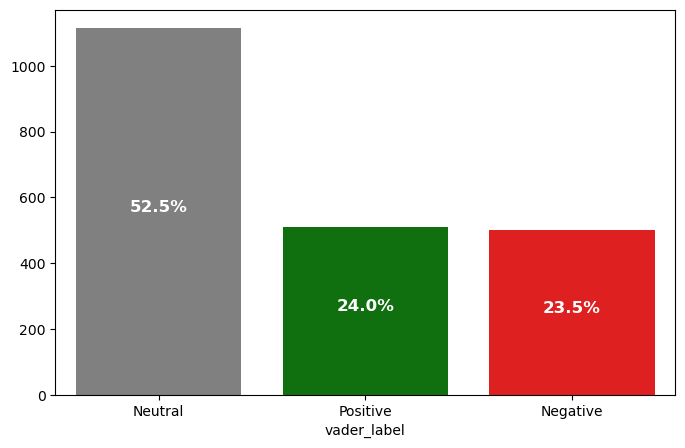

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
def sen_bar_plot(df, sentiment_column):
    sentiment_counts = df[sentiment_column].value_counts()
    total = sentiment_counts.sum()
    sentiment_percentages = (sentiment_counts / total) * 100  # Convert to percentages
    # Custom color palette
    custom_palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'}
    plt.figure(figsize=(8, 5))
    ax=sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)
    # Annotate bars with percentage values
    for i, (count, percentage) in enumerate(zip(sentiment_counts.values, sentiment_percentages.values)):
        ax.text(i, count / 2, f"{percentage:.1f}%", ha='center', fontsize=12, color='white', weight='bold')
    plt.show()

sen_bar_plot(sentiment_df,'vader_label')

/var/folders/0f/_9krm_xj6v3fx4gv1vgm01mw0000gn/T/ipykernel_5549/1540890001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)


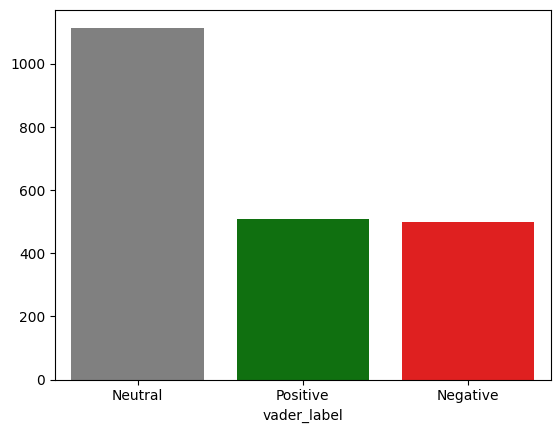

In [ ]:
# # sentiment_df.vader_label.value_counts().plot(kind='bar')

# sentiment_counts = sentiment_df.vader_label.value_counts()

# # Custom colour palette
# custom_palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'}

# # Plotting
# sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)

# # Display plot
# plt.show()

##### Transformer (RoBERTa Model - Twitter trained)
* Pretrained on twitter data, may not be as helpful for news

In [1]:
# Reference: 
# https://www.analyticsvidhya.com/blog/2023/03/analysis-of-amazon-review-using-vader-roberta-and-nltk/
# https://samuelndungula.medium.com/sentiment-analysis-using-vader-and-roberta-5279ba312d70

from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

#Load the pre-trained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\leyon\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administra

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [10]:
import tensorflow as tf

# Predict
def rob_polarity_scores(sentence):
    encoded_text = tokenizer(sentence, return_tensors='tf')
    
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    scores = tf.nn.softmax(scores).numpy()
    
    # scores_dict = {
    #     'rob_neg': scores[0],
    #     'rob_neu': scores[1],
    #     'rob_pos': scores[2]
    # }
    return scores[0], scores[1], scores[2]

sentiment_df[['rob_neg','rob_neu','rob_pos']] = sentiment_df['headline'].apply(rob_polarity_scores).apply(pd.Series)

# Add label based on largest (neg/neu/pos)
sentiment_df['rob_label'] = sentiment_df.apply(lambda x:'Negative' if x['rob_neg'] >
                     x['rob_neu'] and x['rob_neu'] > x['rob_pos'] else ('Neutral' if x['rob_neu']>x['rob_pos'] else 'Positive'),axis=1)

sentiment_df.head()

,pub_date,abstract,lead_para,headline,doc_type,section_name,type_of_material,rank,web_url,apple_label,rob_neg,rob_neu,rob_pos,rob_label
0,2015-01-30,"James B. Stewart, on CNBC, discusses why Apple...","James B. Stewart, on CNBC, discusses why Apple...",Apple’s Near-Death Experience Saved It,multimedia,Business Day,Video,1,https://www.nytimes.com/video/business/1000000...,1,0.021050,0.222241,0.756709,Positive
1,2015-01-14,You probably didn’t know about these five feat...,You probably didn’t know about these five feat...,Use the iPhone’s iOS 8 Like a Pro,multimedia,Technology,Video,5,https://www.nytimes.com/video/technology/perso...,0,0.002749,0.204900,0.792351,Positive
2,2015-03-10,The Apple Watch is good looking for a smartwat...,SAN FRANCISCO — When Apple unveiled its watch ...,"Apple Watch Displays Your Digital World, at a ...",article,Technology,News,5,https://www.nytimes.com/2015/03/10/technology/...,1,0.006221,0.340990,0.652789,Positive
3,2015-03-06,Third-party apps and recent operating system u...,Q. My Android phone just started freezing and ...,Troubleshooting Android in Safe Mode,article,Technology,Question,3,https://www.nytimes.com/2015/03/06/technology/...,0,0.064944,0.839220,0.095836,Neutral
4,2015-03-18,Here are some prominent services offering live...,Here are some prominent services offering live...,"Suddenly, Plenty of Options for Cord Cutters",multimedia,Business Day,Interactive Feature,3,https://www.nytimes.com/interactive/2015/busin...,0,0.016417,0.454158,0.529425,Positive


C:\Users\leyon\AppData\Local\Temp\ipykernel_27572\3156565956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)


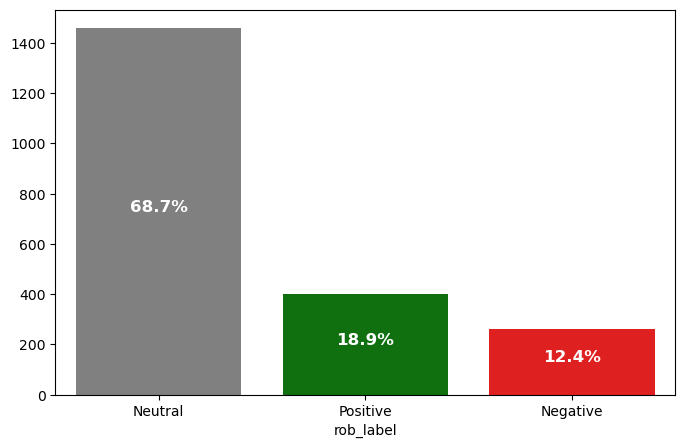

In [27]:


sen_bar_plot(sentiment_df,'rob_label')

##### Transformer (distilRoBERTa Model - financial news sentiment)

https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis/tree/main

In [22]:
# from transformers import AutoTokenizer
# from transformers import TFAutoModelForSequenceClassification
# from scipy.special import softmax

#Load the pre-trained model
MODEL = f"mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\leyon\.cache\huggingface\hub\models--mrm8488--distilroberta-finetuned-financial-news-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the PyTorch model were not used when initializ

In [23]:
# Predict
def drob_polarity_scores(sentence):
    encoded_text = tokenizer(sentence, return_tensors='tf')
    
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    scores = tf.nn.softmax(scores).numpy()
    
    # scores_dict = {
    #     'drob_neg': scores[0],
    #     'drob_neu': scores[1],
    #     'drob_pos': scores[2]
    # }
    return scores[0], scores[1], scores[2]

sentiment_df[['drob_neg','drob_neu','drob_pos']] = sentiment_df['headline'].apply(drob_polarity_scores).apply(pd.Series)

# Add label based on largest (neg/neu/pos)
sentiment_df['drob_label'] = sentiment_df.apply(lambda x:'Negative' if x['drob_neg'] >
                     x['drob_neu'] and x['drob_neu'] > x['drob_pos'] else ('Neutral' if x['drob_neu']>x['drob_pos'] else 'Positive'),axis=1)

sentiment_df.head()

,pub_date,abstract,lead_para,headline,doc_type,section_name,type_of_material,rank,web_url,apple_label,rob_neg,rob_neu,rob_pos,rob_label,vader_sent,vader_label,drob_neg,drob_neu,drob_pos,drob_label
0,2015-01-30,"James B. Stewart, on CNBC, discusses why Apple...","James B. Stewart, on CNBC, discusses why Apple...",Apple’s Near-Death Experience Saved It,multimedia,Business Day,Video,1,https://www.nytimes.com/video/business/1000000...,1,0.021050,0.222241,0.756709,Positive,0.4215,Positive,0.003524,0.012138,0.984338,Positive
1,2015-01-14,You probably didn’t know about these five feat...,You probably didn’t know about these five feat...,Use the iPhone’s iOS 8 Like a Pro,multimedia,Technology,Video,5,https://www.nytimes.com/video/technology/perso...,0,0.002749,0.204900,0.792351,Positive,0.3612,Positive,0.000063,0.999886,0.000051,Neutral
2,2015-03-10,The Apple Watch is good looking for a smartwat...,SAN FRANCISCO — When Apple unveiled its watch ...,"Apple Watch Displays Your Digital World, at a ...",article,Technology,News,5,https://www.nytimes.com/2015/03/10/technology/...,1,0.006221,0.340990,0.652789,Positive,0.0000,Neutral,0.000077,0.999868,0.000055,Neutral
3,2015-03-06,Third-party apps and recent operating system u...,Q. My Android phone just started freezing and ...,Troubleshooting Android in Safe Mode,article,Technology,Question,3,https://www.nytimes.com/2015/03/06/technology/...,0,0.064944,0.839220,0.095836,Neutral,0.5574,Positive,0.071110,0.928450,0.000440,Neutral
4,2015-03-18,Here are some prominent services offering live...,Here are some prominent services offering live...,"Suddenly, Plenty of Options for Cord Cutters",multimedia,Business Day,Interactive Feature,3,https://www.nytimes.com/interactive/2015/busin...,0,0.016417,0.454158,0.529425,Positive,0.0000,Neutral,0.000059,0.999347,0.000594,Neutral


C:\Users\leyon\AppData\Local\Temp\ipykernel_27572\3156565956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)


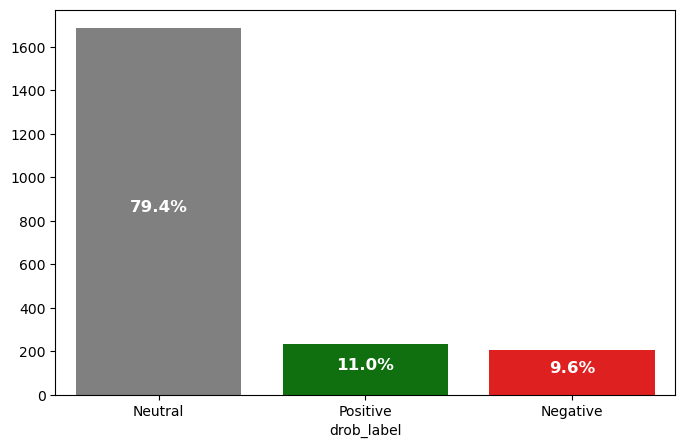

In [28]:
sen_bar_plot(sentiment_df,'drob_label')

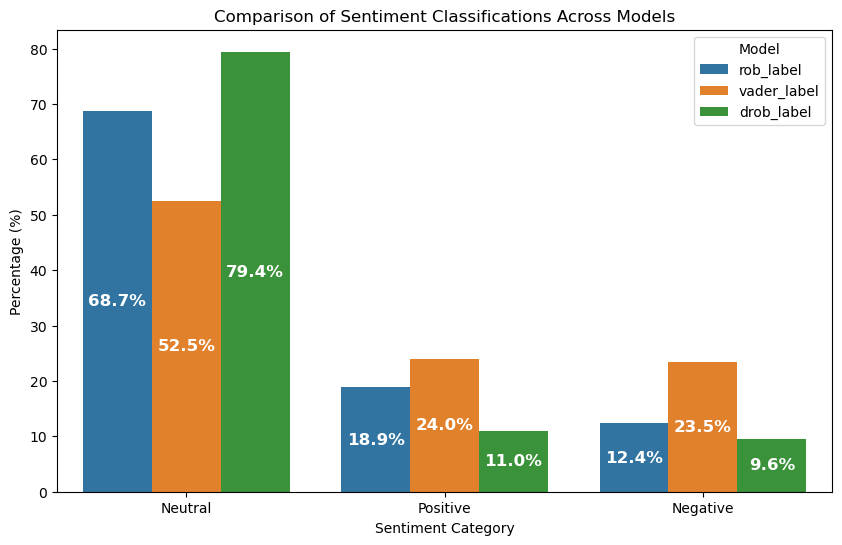

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_sentiment_models(df, model_columns):
   
    # Count occurrences of each sentiment per model
    sentiment_counts = {}
    for model in model_columns:
        sentiment_counts[model] = df[model].value_counts(normalize=True) * 100  # Convert to percentage

    sentiment_df = pd.DataFrame(sentiment_counts).fillna(0)

    sentiment_df = sentiment_df.reset_index().rename(columns={"index": "Sentiment"})
    sentiment_df_melted = sentiment_df.melt(id_vars=["Sentiment"], var_name="Model", value_name="Percentage")

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x="Sentiment", y="Percentage", hue="Model", data=sentiment_df_melted)

    # Annotate bars with percentages
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with non-zero values
            ax.annotate(f"{height:.1f}%", 
                        (p.get_x() + p.get_width() / 2., height / 2),  # Position text in the middle of the bar
                        ha='center', va='center', fontsize=12, color='white', fontweight='bold')

    # Labels and title
    plt.xlabel("Sentiment Category")
    plt.ylabel("Percentage (%)")
    plt.title("Comparison of Sentiment Classifications Across Models")
    plt.legend(title="Model")

    # Display the plot
    plt.show()

compare_sentiment_models(sentiment_df, ["rob_label", "vader_label", "drob_label"])


##### Transfomer (RoBERTa Model - News trained)

https://huggingface.co/rahilv/news-sentiment-analysis-roberta OR
https://huggingface.co/fhamborg/roberta-targeted-sentiment-classification-newsarticles 

In [ ]:
# from transformers import AutoTokenizer
# from transformers import TFAutoModelForSequenceClassification
# from scipy.special import softmax

#Load the pre-trained model
MODEL = f"rahilv/news-sentiment-analysis-roberta"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

OSError: Can't load tokenizer for 'rahilv/news-sentiment-analysis-roberta'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'rahilv/news-sentiment-analysis-roberta' is the correct path to a directory containing all relevant files for a RobertaTokenizerFast tokenizer.

In [ ]:
# sentiment_df.to_csv('headline_sent.csv')

##### Transformer

In [ ]:
# ! pip install tensorflow
# ! pip install transformers
# ! conda update tensorflow keras



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Users\leyon\anaconda3\envs\new_etlenv
  package name: tensorflow




In [ ]:
# testing
from transformers import pipeline
import tensorflow as tf
classifier = pipeline("sentiment-analysis")
print(classifier("Apple's stock is performing great!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


[{'label': 'POSITIVE', 'score': 0.9998513460159302}]


In [ ]:
# Extract labels and scores into separate columns
sentiment_df['headline_label'] = sentiment_df['headline'].apply(lambda x: classifier(x)[0]['label'])
sentiment_df['headline_score'] = sentiment_df['headline'].apply(lambda x: classifier(x)[0]['score'])

sentiment_df['abstract_label'] = sentiment_df['abstract'].apply(lambda x: classifier(x)[0]['label'])
sentiment_df['abstract_score'] = sentiment_df['abstract'].apply(lambda x: classifier(x)[0]['score'])


def classify_sentiment(row):
    # If both labels are the same, use that label
    if row['headline_label'] == row['abstract_label']:
        return row['headline_label']
    # If scores are different, take the one with the higher score
    elif row['headline_score'] < row['abstract_score']:
        return row['abstract_label']
    else:
        return row['headline_label']


sentiment_df['transf_sent'] = sentiment_df.apply(classify_sentiment, axis=1)


sentiment_df # will take a while 

,pub_date,abstract,lead_para,headline,doc_type,section_name,type_of_material,rank,web_url,NLTK_sentiment,sentiment_label,vader_sent,headline_label,headline_score,abstract_label,abstract_score,transf_sent
0,2015-01-30,"James B. Stewart, on CNBC, discusses why Apple became twice as big as Microsoft. One reason: Apple’s willingness to “destroy” its own products in the interest of innovation.","James B. Stewart, on CNBC, discusses why Apple became twice as big as Microsoft. One reason: Apple’s willingness to “destroy” its own products in the interest of innovation.",Apple’s Near-Death Experience Saved It,multimedia,Business Day,Video,1,https://www.nytimes.com/video/business/100000003482723/apples-near-death-experience-saved-it.html,0.59660,Positive,0.59660,POSITIVE,0.997434,NEGATIVE,0.979103,POSITIVE
1,2015-01-14,"You probably didn’t know about these five features hidden in the iPhone’s iOS 8 operating system. Use them, and you’ll be using your phone like a pro.","You probably didn’t know about these five features hidden in the iPhone’s iOS 8 operating system. Use them, and you’ll be using your phone like a pro.",Use the iPhone’s iOS 8 Like a Pro,multimedia,Technology,Video,5,https://www.nytimes.com/video/technology/personaltech/100000003448481/use-the-iphones-ios8-like-a-pro.html,0.36120,Positive,0.36120,NEGATIVE,0.728277,NEGATIVE,0.997372,NEGATIVE
2,2015-03-10,"The Apple Watch is good looking for a smartwatch and not hard to use, according to initial impressions. But who knows if it is really a necessary purchase.","SAN FRANCISCO — When Apple unveiled its watch last fall, the company showed only demo models of the new device — polished prototypes of the hardware running nonworking loops of the software.","Apple Watch Displays Your Digital World, at a Glance",article,Technology,News,5,https://www.nytimes.com/2015/03/10/technology/personaltech/apple-watch-displays-your-digital-world-at-a-glance.html,0.18555,Positive,0.18555,POSITIVE,0.972429,POSITIVE,0.989358,POSITIVE
3,2015-03-06,Third-party apps and recent operating system updates are often the cause; starting the phone in Safe Mode can help narrow down the search for a culprit.,Q. My Android phone just started freezing and crashing a few days ago. What would cause it to do so?,Troubleshooting Android in Safe Mode,article,Technology,Question,3,https://www.nytimes.com/2015/03/06/technology/personaltech/troubleshooting-android-in-safe-mode.html,0.61910,Positive,0.61910,NEGATIVE,0.993856,NEGATIVE,0.996871,NEGATIVE
4,2015-03-18,"Here are some prominent services offering live TV, à la carte networks and other on-demand streaming options in the United States.","Here are some prominent services offering live TV, à la carte networks and other on-demand streaming options in the United States.","Suddenly, Plenty of Options for Cord Cutters",multimedia,Business Day,Interactive Feature,3,https://www.nytimes.com/interactive/2015/business/media/streaming-tv-cord-cutting-guide.html,0.31245,Positive,0.31245,NEGATIVE,0.954004,POSITIVE,0.971168,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2024-12-07,Smartphone apps downloaded from Apple and Google can allow parents and other abusers to connect with pedophiles who pay to watch — and direct — criminal behavior.,"The promotional photo showed a mother affectionately hugging and kissing her daughter. The girl, around 8 years old, smiled into the camera.","On These Apps, the Dark Promise of Mothers Sexually Abusing Children",article,U.S.,News,8,https://www.nytimes.com/2024/12/07/us/child-abuse-apple-google-apps.html,-0.46790,Negative,-0.46790,POSITIVE,0.690404,NEGATIVE,0.982468,NEGATIVE
2139,2024-07-31,"Since 2022, Tripp Mickle has covered news surrounding one of the biggest technology companies in Silicon Valley.","Some journalists have broad beats — animals, the entire state of California, even the cosmos.",The Apple of One Business Reporter’s Eye,article,Times Insider,News,2,https://www.nytimes.com/2024/07/31